In [1]:
import base64
import numpy as np 
import pandas as pd
import altair as alt
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
macro = 3111

In [3]:
df_data = pd.read_csv(f'data/dengue_{macro}.csv.gz', index_col = 'Unnamed: 0')
df_data = df_data.loc['2023-06-01':]
df_data.reset_index(inplace = True)

df_data.head()

,index,casos_est_3101706,p_rt1_3101706,Rt_3101706,p_inc100k_3101706,casos_est_3144300,p_rt1_3144300,Rt_3144300,p_inc100k_3144300,casos_est_3168606,...,umid_mean_small,umid_amp_small,pressao_mean_small,month,SE,diff_casos_est_3101706,diff_casos_est_3144300,diff_casos_est_3168606,diff_casos_est_3111,diff_casos_est_small
0,2023-06-04,1.0,0.193071,0.421443,2.505324,26.0,0.757036,1.223169,74.997116,46.0,...,74.736371,38.663661,1.006526,6,23,0.0,-8.0,-2.0,-37.0,-27.0
1,2023-06-11,2.0,0.590245,1.238887,5.010648,25.0,0.445242,0.962463,72.112610,44.0,...,74.060908,43.161525,1.007608,6,24,1.0,-1.0,-2.0,10.0,12.0
2,2023-06-18,2.0,0.642994,1.423877,5.010648,33.0,0.768987,1.207431,95.188644,40.0,...,72.680064,42.939279,1.006170,6,25,0.0,8.0,-4.0,-3.0,-7.0
3,2023-06-25,0.0,0.000000,0.000000,0.000000,25.0,0.363746,0.908943,72.112610,25.0,...,72.944556,40.257018,1.008450,6,26,-2.0,-8.0,-15.0,-29.0,-4.0
4,2023-07-02,0.0,0.000000,0.000000,0.000000,16.0,0.036234,0.577952,46.152073,23.0,...,72.770045,43.754681,1.007417,7,27,0.0,-9.0,-2.0,-19.0,-8.0


In [4]:
df_for = pd.read_csv(f'data/forecast_{macro}.csv.gz', index_col = 'Unnamed: 0')

df_for.head()

,date,lower_2_5,lower_25,forecast,upper_75,upper_97_5,macroregion,prob_high,prob_low,HT,LT,HTinc,LTinc
0,2024-05-05,473.677127,669.919854,761.114539,905.750373,1159.331312,3111,100.0,0.0,156.704859,34.318694,18.777393,4.112289
1,2024-05-12,402.266166,603.891784,721.792206,842.675154,1020.274587,3111,100.0,0.0,131.257169,28.564988,15.728086,3.422842
2,2024-05-19,272.088752,567.967217,638.313062,739.572232,1013.604121,3111,100.0,0.0,100.908079,22.356897,12.091461,2.678949
3,2024-05-26,512.321015,647.609222,723.350015,834.577608,1006.303866,3111,100.0,0.0,91.716991,23.351514,10.990125,2.798130


In [5]:
shape_macro = gpd.read_file('data/shapefile_macro.gpkg')

shape_macro = shape_macro.loc[shape_macro.uf == int(str(macro)[:2])]

shape_macro.head()

/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,code_macro,uf,geometry
47,3113,31,"POLYGON ((-49.37149 -19.54108, -49.37168 -19.5..."
48,3103,31,"POLYGON ((-44.35461 -20.49340, -44.35812 -20.4..."
49,3110,31,"POLYGON ((-43.03439 -20.91340, -43.03600 -20.9..."
50,3114,31,"MULTIPOLYGON (((-42.38292 -19.86451, -42.38628..."
51,3106,31,"POLYGON ((-42.28788 -18.96869, -42.28859 -18.9..."


/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/de

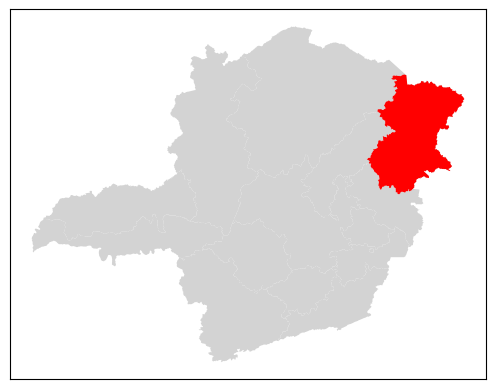

In [6]:
fig,ax2 = plt.subplots()

shape_macro.plot(ax=ax2, color='lightgray')

shape_macro.loc[shape_macro.code_macro == macro].plot(ax=ax2, color='red')

ax2.set_xticks([])
ax2.set_yticks([])

plt.savefig(f'data/shape_{macro}.png', bbox_inches = 'tight', dpi = 500)
plt.show()

### Altair figure without map

In [7]:
width = 375

base = alt.Chart(df_data, title=f"Forecast of dengue at {macro}").mark_line().encode(
    x=alt.X('index:T').title('Date'),
    y=alt.Y(f'casos_est_{macro}:Q').title('New cases'), 
     color=alt.value('black'), 
    tooltip=[alt.Tooltip('index:T', title='Date'),
             alt.Tooltip(f'casos_est_{macro}:Q', title='New cases', format='.0f')]
).properties(
    width=width, 
)

median = alt.Chart(df_for).mark_line().encode(
    x=alt.X('date:T').title('Date'),
    y=alt.Y('forecast:Q').title('New cases'), 
     color=alt.value('red'),
    tooltip=[alt.Tooltip('date:T', title='Date'),
             alt.Tooltip('lower_2_5:Q', title='IC (2.5%)', format='.0f'),
             alt.Tooltip('lower_25:Q', title='IC (25%)', format='.0f'),
             alt.Tooltip('forecast:Q', title='Forecast', format='.0f'), 
             alt.Tooltip('upper_75:Q', title='IC (75%)', format='.0f'), 
             alt.Tooltip('upper_97_5:Q', title='IC (97.5%)', format='.0f')] 
).properties(
   
).properties(
    width=width, 
)

conf1 = median.mark_area(
    opacity=0.25,
).encode(
    x='date:T',
    y='lower_25:Q',
    y2='upper_75:Q',
    color=alt.value('red')
)

conf2 = median.mark_area(
    opacity=0.25,
).encode(
    x='date:T',
    y='lower_2_5:Q',
    y2='upper_97_5:Q',
    color=alt.value('red')
)



combined_chart = alt.vconcat(base+ median+ conf1+conf2).resolve_scale(
    x='shared'  # Share the x-axis between the two plots
)

combined_chart

alt.VConcatChart(...)

### Altair figure with image: 

alt.VConcatChart(...)
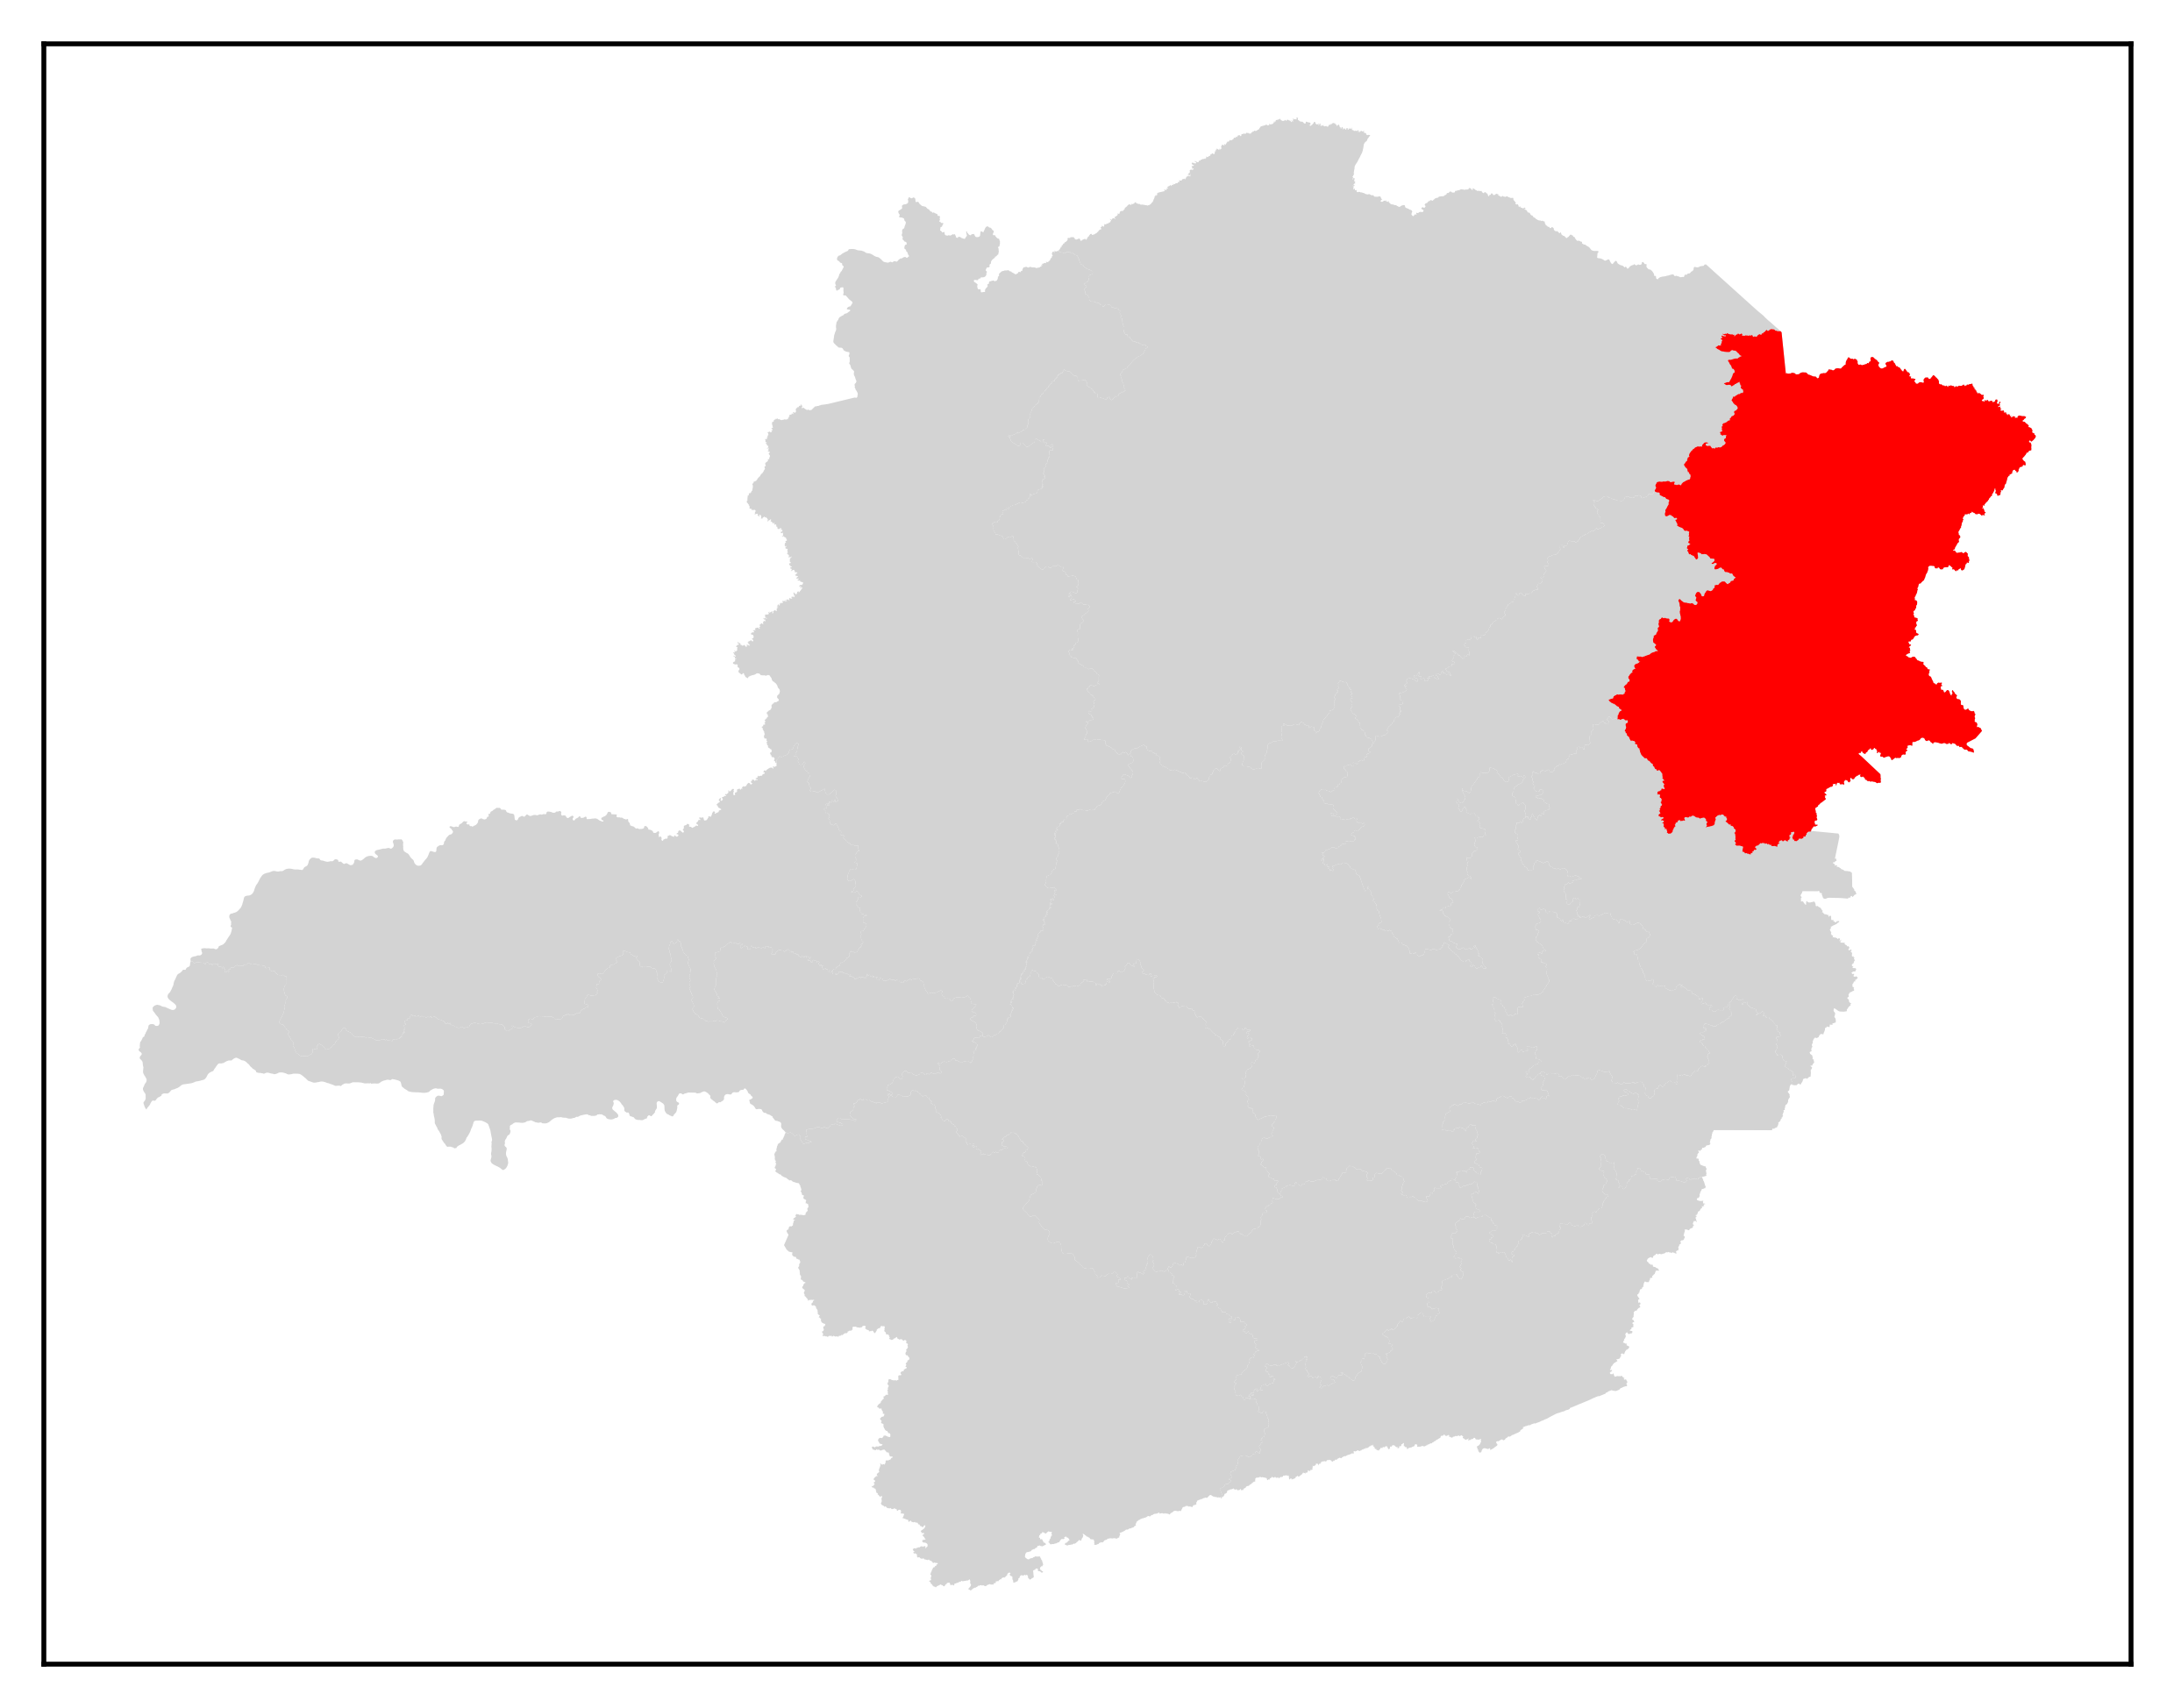

In [8]:
width = 375

base = alt.Chart(df_data, title=f"Forecast of dengue at {macro}").mark_line().encode(
    x=alt.X('index:T').title('Date'),
    y=alt.Y(f'casos_est_{macro}:Q').title('New cases'), 
     color=alt.value('black'), 
    tooltip=[alt.Tooltip('index:T', title='Date'),
             alt.Tooltip(f'casos_est_{macro}:Q', title='New cases', format='.0f')]
).properties(
    width=width, 
)

median = alt.Chart(df_for).mark_line().encode(
    x=alt.X('date:T').title('Date'),
    y=alt.Y('forecast:Q').title('New cases'), 
     color=alt.value('red'),
    tooltip=[alt.Tooltip('date:T', title='Date'),
             alt.Tooltip('lower_2_5:Q', title='IC (2.5%)', format='.0f'),
             alt.Tooltip('lower_25:Q', title='IC (25%)', format='.0f'),
             alt.Tooltip('forecast:Q', title='Forecast', format='.0f'), 
             alt.Tooltip('upper_75:Q', title='IC (75%)', format='.0f'), 
             alt.Tooltip('upper_97_5:Q', title='IC (97.5%)', format='.0f')] 
).properties(
   
).properties(
    width=width, 
)

conf1 = median.mark_area(
    opacity=0.25,
).encode(
    x='date:T',
    y='lower_25:Q',
    y2='upper_75:Q',
    color=alt.value('red')
)

conf2 = median.mark_area(
    opacity=0.25,
).encode(
    x='date:T',
    y='lower_2_5:Q',
    y2='upper_97_5:Q',
    color=alt.value('red')
)


# Convert the local image to a base64 string
image_path = f"data/shape_{macro}.png"  # Replace with the path to your local image
with open(image_path, "rb") as img_file:
    b64_string = base64.b64encode(img_file.read()).decode('utf-8')
image_url = f"data:image/png;base64,{b64_string}"

y_value = 0.88*max(max(df_data.casos_est_3111),  max(df_for.upper_97_5))


image_annotation = alt.Chart(pd.DataFrame({'date': [pd.Timestamp('2023-07-30')], 'value': [y_value]})).mark_image(
    url=image_url,
    width=100,
    height=100
).encode(
    x='date:T',
    y='value:Q'
)



combined_chart = alt.vconcat(base+ median+ conf1+conf2 + image_annotation).resolve_scale(
    x='shared'  # Share the x-axis between the two plots
)

combined_chart